Hurricane Katrina
-----------------

This is an example notebook taken and annotated from the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html) example gallery:

[https://scitools.org.uk/cartopy/docs/latest/gallery/hurricane_katrina.html#sphx-glr-gallery-hurricane-katrina-py](https://scitools.org.uk/cartopy/docs/latest/gallery/hurricane_katrina.html#sphx-glr-gallery-hurricane-katrina-py)

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [31]:
"""
List of latitudes and a list of longitudes (lons, lats)
for Hurricane Katrina (2005).

The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
https://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

"""
lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
        -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
        -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
        -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
        -85.3, -82.9]

lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
        25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
        25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
        35.6, 37.0, 38.6, 40.1]

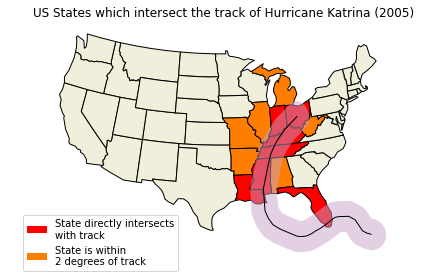

In [32]:
fig = plt.figure()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
              frameon=False)

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(
resolution='110m',
category='cultural',
name=shapename
)

# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
track_buffer = track.buffer(2)

def colorize_state(geometry):
    """ Colors the States that intersect the Hurricane track """
    facecolor = (0.9375, 0.9375, 0.859375)
    if geometry.intersects(track):
        facecolor = 'red'
    elif geometry.intersects(track_buffer):
        facecolor = '#FF7E00'
    return {'facecolor': facecolor, 'edgecolor': 'black'}

################
""" Statemap """
################

ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state
)

#######################
""" Hurricane Track """
#######################

ax.add_geometries(
    [track_buffer],
    ccrs.PlateCarree(),
    facecolor='#C8A2C8',
    alpha=0.5
)

ax.add_geometries(
   [track],
    ccrs.PlateCarree(),
    facecolor='none',
    edgecolor='k'
)

##############
""" Legend """
##############

ax.set_title('US States which intersect the track of '
             'Hurricane Katrina (2005)')

# make two proxy artists to add to a legend
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")

labels = ['State directly intersects\nwith track',
          'State is within \n2 degrees of track']

ax.legend(
    [direct_hit, within_2_deg],
    labels,
    loc='lower left',
    bbox_to_anchor=(0.025, -0.1),
    fancybox=True
)

plt.show()